# Visualizing the Relationships Between Quantitative Features

So far we've looked at the distribution of single features, the distribution of two categorical features, and how to visualize differences between groups.  In this lesson we'll discuss how to look at the relationships between two quantitative features.  

## Medical Cost Personal Dataset:

How do personal features like age, BMI, smoking status and the region you live in effect how much you pay for healthcare?  The medical cost personal dataset shows the cost billed by health insurance companies for individuals based on their age, sex, BMI, number of children, smoking status, geographical region, and likelihood of an insurance claim.

Do older people, in general, pay more for healthcare?  How do other factors like BMI and smoking effect your healthcare costs?  We'll find the answers to these questions in this lesson.

Let's import pandas, matplotlib and seaborn and read in the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('assets/insurance_subset.csv', encoding='ISO-8859-1')

df.head()

,age,sex,bmi,children,smoker,region,charges,claim_risk
0,19,female,27.900,0,yes,southwest,16884.92400,medium
1,18,male,33.770,1,no,southeast,1725.55230,low
2,28,male,33.000,3,no,southeast,4449.46200,low
3,33,male,22.705,0,no,northwest,21984.47061,medium
4,32,male,28.880,0,no,northwest,3866.85520,low


In this lesson, we are looking at the relationships between quantitative features.  Which three features are quantitative and continuous?  

The classic figure for examining the relationship between two quantitative features is called a scatterplot.  You've probably made them before.  We graph the value of one feature on the x-axis and the value of the other feature on the y-axis.  The pattern formed by the data tells us about the relationship between the two features.

To start, we are going to graph the relationship between age (on the x-axis) and healthcare charges (on the y-axis).

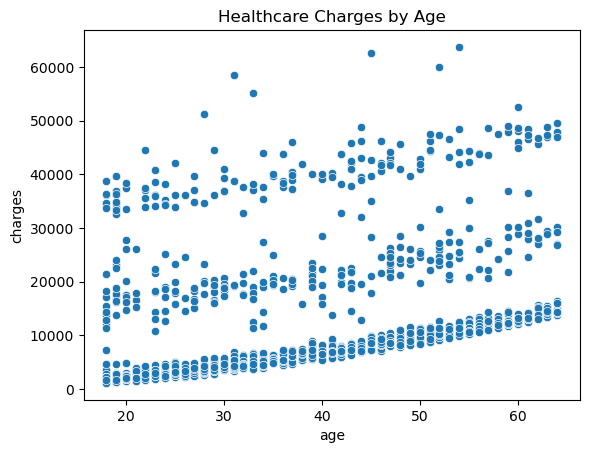

In [2]:
#Scatterplot of age vs healthcare charges
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Healthcare Charges by Age')
plt.show()

In general, we see that healthcare chargest tend to increase as people get older.  However, that relationship isn't perfect.  There appear to be three distinct groups in the scatterplot.  Also, within each group, a few people pay way more when they get old.  A few young people pay a lot.  Some people pay much less than everyone else.  However - in general - healthcare charges go up as age increases.

Because the data points fall roughly in a line, we can represent the relationship between the two features with a linear model.  You'll talk a lot more about exactly how this works - how the model is fit to the data,how to tell if it's a good model or not, what to do about the fact that there appear to be three subgroups - in the machine learning course.

Let's see if we can figure out - based on other features in the data - why there appear to be three distinct groups.  To do this, we can color-code the figure based on another feature.  Let's start with `claim_risk`.  Are some people paying more for healthcare because the insurance company has deemed them a higher claim risk?

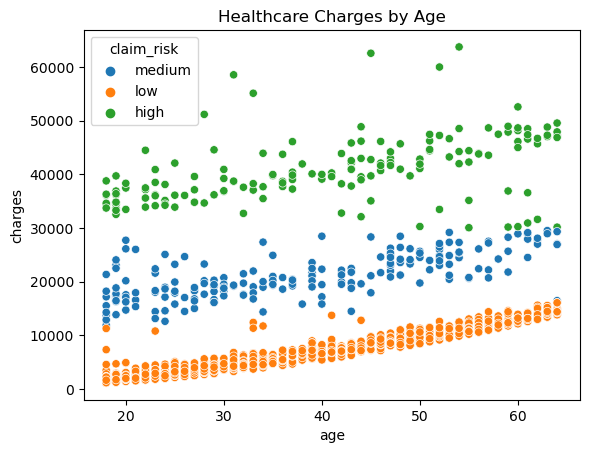

In [3]:
#Scatterplot of age vs healthcare charges with regression line
sns.scatterplot(x='age', y='charges', hue='claim_risk', data=df)
plt.title('Healthcare Charges by Age')
plt.show()

That certainly seems to explain most of the differences.  Even still, there's a lot of variation within each group in healthcare costs for individuals of the same age.  Also, how did the insurance company come up with these risk categories?  Let's look at some other features.  Smoking, for example. 

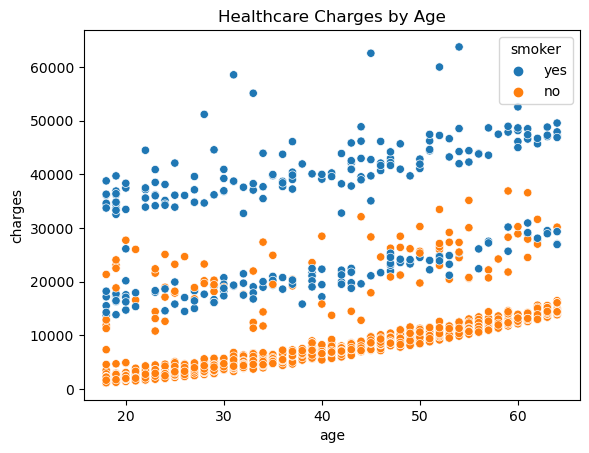

In [4]:
#Scatterplot of age vs healthcare charges 
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Healthcare Charges by Age')
plt.show()

That also seems to make a big impact.  The low risk, lowest cost group is comprised of all non-smokers, while the highest risk, highest cost group is comprised of all smokers.  The middle group contains both smokers and non-smokers.

What about BMI?  We can also add color with our `hue=` feature is continuous.

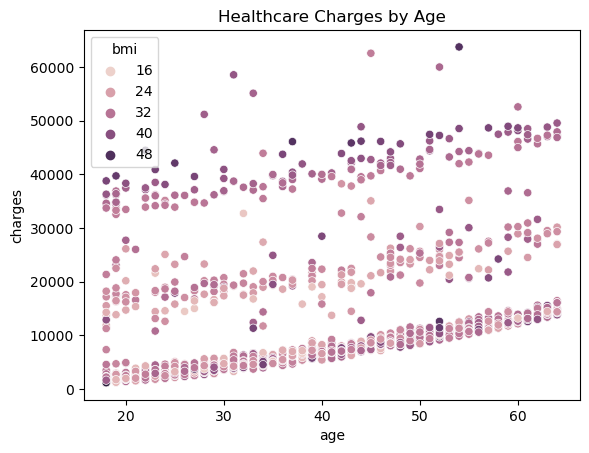

In [5]:
#Scatterplot with BMI continuous

sns.scatterplot(x='age', y='charges', hue='bmi', data=df)
plt.title('Healthcare Charges by Age')
plt.show()

It looks like there's a mix of people with different BMIs in all three groups.

It's not always the case that every feature in your data will be related to your target.  Let's look at patient sex.  Does that seem to impact how much the person will pay in healthcare costs?

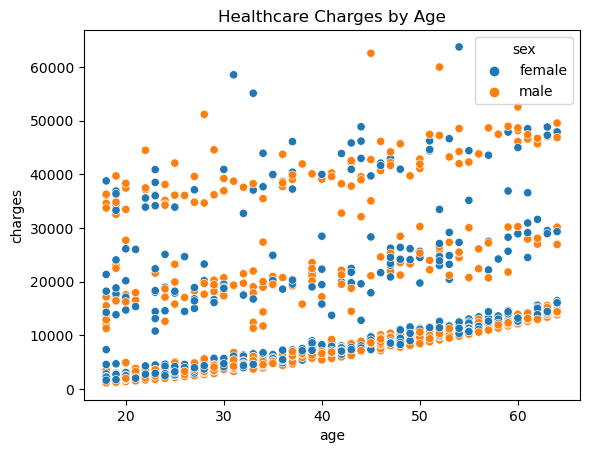

In [6]:
#Scatterplot with identification of male/female

sns.scatterplot(x='age', y='charges', hue='sex', data=df)
plt.title('Healthcare Charges by Age')
plt.show()

It doesn't appear to have an impact.  There are male and female patients represented in each of the three groups and they appear to be all mixed together.  There doesn't appear to be a pattern of male or female patients paying more for care at a particular age.

## Modeling

In data science, we are often interested in developing a model of our data.  A model is a mathematical representation of the general relationship present in our data.  

**If the pattern of our data is roughly a line (either in the positive or negative direction) we can represent our data using a line - aka a linear model - aka linear regression.**  Because our data is clearly in three different groups, it makes sense to represent our data using three lines rather than one.  

You'll learn much more about the ins and outs of this procedure, known as linear regression, in the machine learning course.  For now, it's enough to see a visual representation of using a model to summarize the relationship of age to healthcare costs for each group.  

**Ideally your linear regression line should run right through the middle of your data, crossing as many points as possible.  There should be an approximately equal number of points above and below the regression line.**

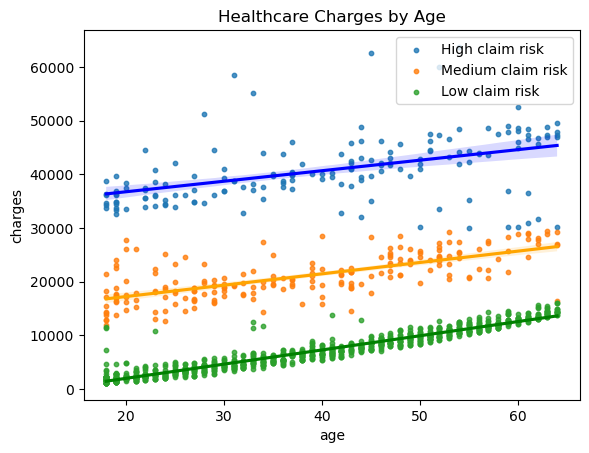

In [7]:
# Regplot allows us to plot a regression line.  scatter_kws and line_kws control the color and size of the points and regression lines plotted

sns.regplot(x='age', y='charges', data=df[df['claim_risk'] == 'high'], label='High claim risk', scatter_kws={'s':10}, line_kws={"color": "blue"})

sns.regplot(x='age', y='charges', data=df[df['claim_risk'] == 'medium'], label='Medium claim risk', scatter_kws={'s':10}, line_kws={"color": "orange"})

sns.regplot(x='age', y='charges', data=df[df['claim_risk'] == 'low'], label='Low claim risk', scatter_kws={'s':10}, line_kws={"color": "green"})

plt.legend()
plt.title('Healthcare Charges by Age')
plt.show()

We couldn't use this model to perfectly predict the healthcare costs for an individual at a specific age.  However, if you were a healthcare economist, it could give you a ballpark figure how how much you expect costs to go up as people age depending on if they were at a low, medium or high claim risk.

In the words of the famous statistician George Box (who is different from the boxplot guy, John Tukey):

**"All models are wrong, but some are useful."**

## When is a line not a good fit for the data?

Linear models are a powerful data analysis tool.  They do a great job in a lot of situations.  However, it's important to be on the lookout for times when a linear model is a poor fit for your data.  Making a visualization is often the easiest way to check for model fit issues ahead of time.

A linear model is not a good fit for your data if:

**1. Your data is made up of more than one distinct group.**

One single line won't do a good job capturing the relationships for the individual groups.  Here the regression line passes through almost none of the points.

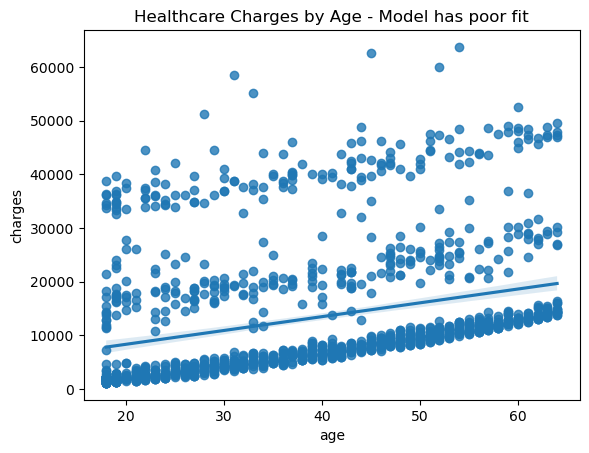

In [8]:
sns.regplot(x='age', y='charges', data=df)

plt.title('Healthcare Charges by Age - Model has poor fit')
plt.show()


**2. When there are outliers that fall far outside the normal range of the data.**

Here's an example plotting the relationship of age and fare paid in the Titanic data.  See those two people who were a little younger than 40 and paid 500 pounds for their tickets?  Those are outliers.  This model doesn't fit well because there are way more points above the line than below it, and there are big outliers at the top of the figure.

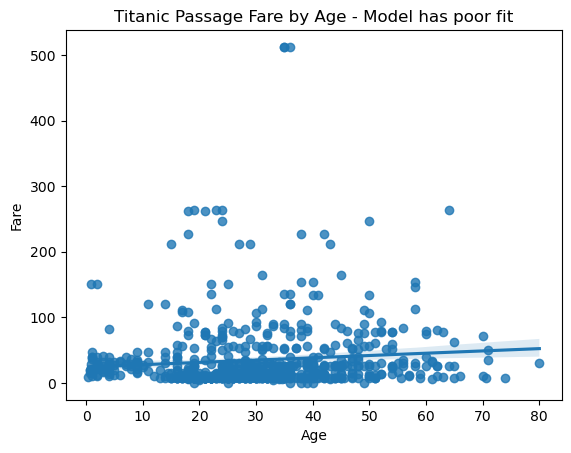

In [9]:
#Plotting the Titanic data
df = pd.read_csv('assets/titanic_passengers.csv')

sns.regplot(x='Age', y='Fare', data=df)

plt.title('Titanic Passage Fare by Age - Model has poor fit')
plt.show()

**3. When there is a curved rather than linear relationship in the data.**

Here is a plot of the cumulative revenue each week the film was showing.  You can see that the relationship of cumulative revenue to the number of weeks the film had been shown is curved rather than a straight line.  There are mathematical ways to transform a curved relationship into a straight line relationship, but we might not know one is present if we don't visualize the data.


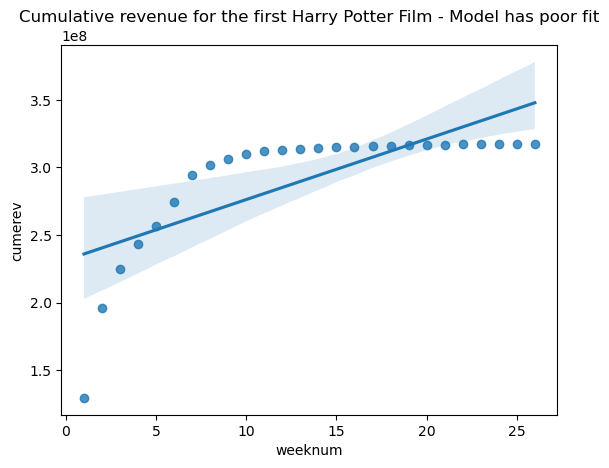

In [10]:
#Plotting the cumulative revenue of the first Harry Potter film

df = pd.read_csv('assets/harrypotter.csv', encoding='ISO-8859-1')

sns.regplot(x='weeknum', y='cumerev', data=df.loc[df['film']==1])
plt.title('Cumulative revenue for the first Harry Potter Film - Model has poor fit')
plt.show()

# How to tackle nonlinear relationships

This is something you'll dig into in much more detail in the machine learning class, but it's possible to model the relationship between two features with a non-linear relationship.
Often this involves some trial and error on the part of the data scientist.  In this example, we look at modeling the relationship between temperature and quality in a manufacturing process.

## Exponential Relationships

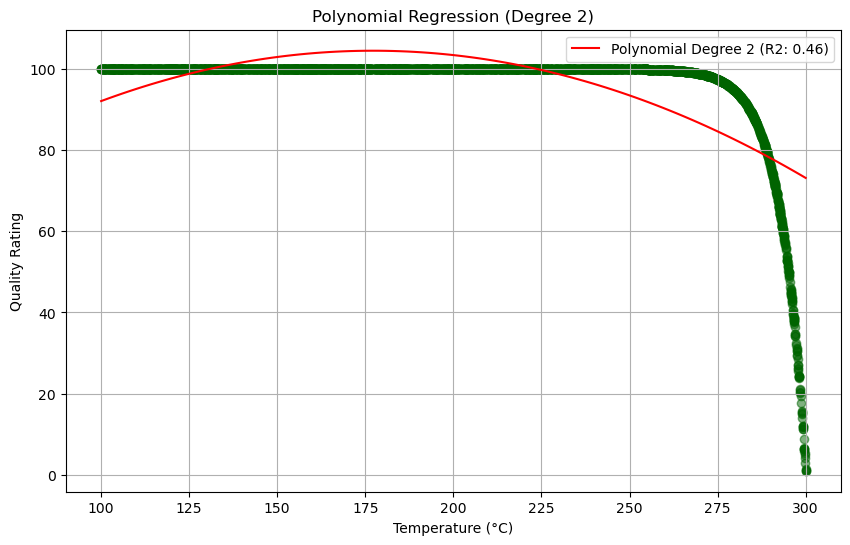

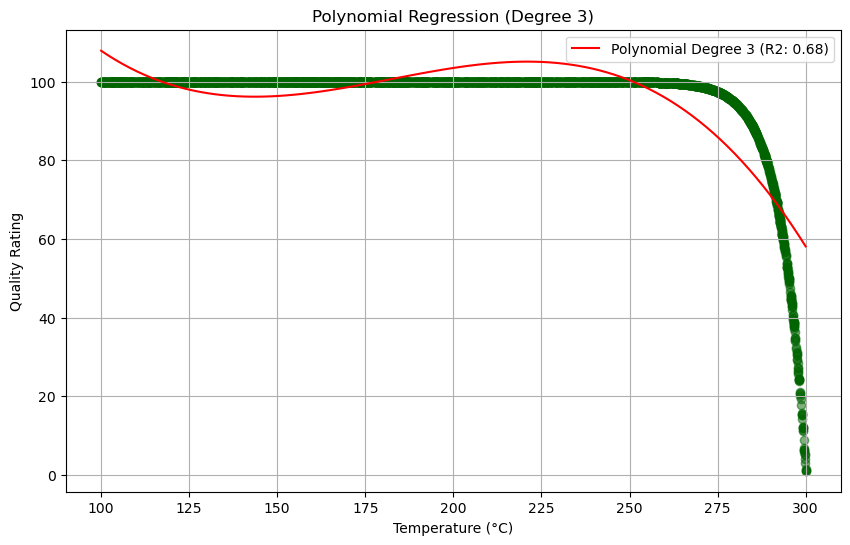

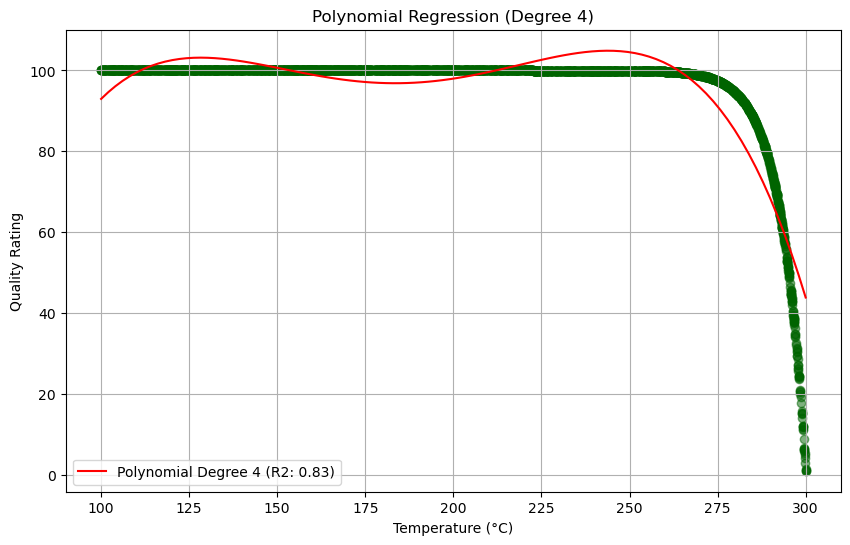

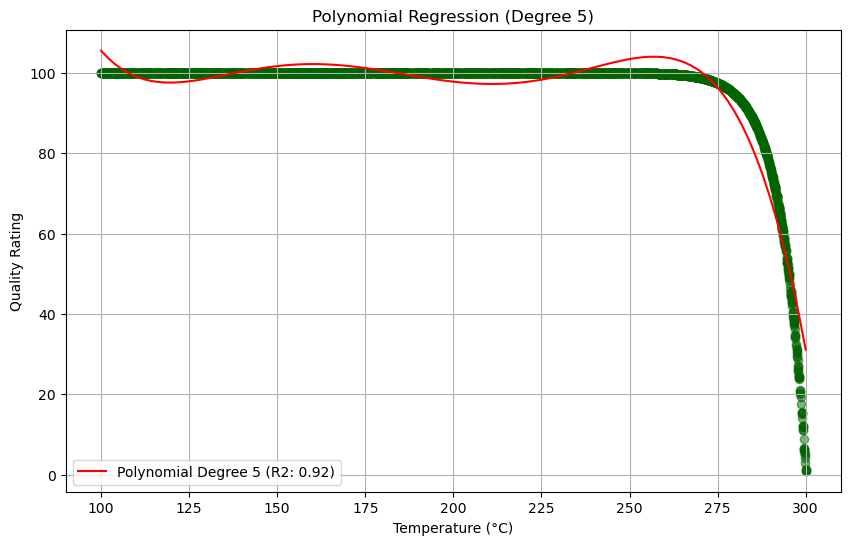

In [11]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Function to apply polynomial regression and plot results
def apply_and_plot_polynomial_regression(degree, X_train, X_test, y_train, y_test):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, alpha=0.5, color='darkgreen')
    plt.scatter(X_test, y_test, alpha=0.5, color='darkgreen')
    
    # Plot the model
    X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_fit = model.predict(poly.transform(X_fit))
    plt.plot(X_fit, y_fit, color='red', label=f'Polynomial Degree {degree} (R2: {r2:.2f})')

    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Quality Rating')
    plt.legend()
    plt.grid(True)
    plt.show()

    return r2

manufacturing_data = pd.read_csv('assets/manufacturing.csv', encoding='ISO-8859-1')
manufacturing_data.rename(columns={'Temperature (Â°C)': 'Temperature (°C)'}, inplace=True)

# Preparing the data
X = manufacturing_data[['Temperature (°C)']].values
y = manufacturing_data['Quality Rating'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply and plot polynomial regression for different degrees
degrees = [2, 3, 4, 5]
for degree in degrees:
    apply_and_plot_polynomial_regression(degree, X_train, X_test, y_train, y_test)


## Logarithmic Relationship

In this example, we look at the relationship between the carat value and cost of a diamond.

Before log transformation:

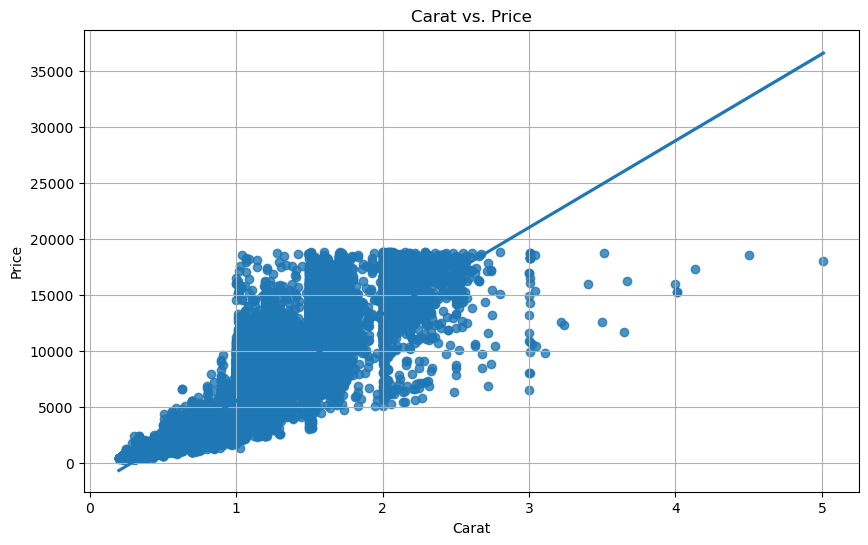

In [12]:
import numpy as np

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

plt.figure(figsize=(10, 6))
sns.regplot(x = 'carat', y='price', data=diamonds)
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Experimenting with log transformations to find the best linear relationship

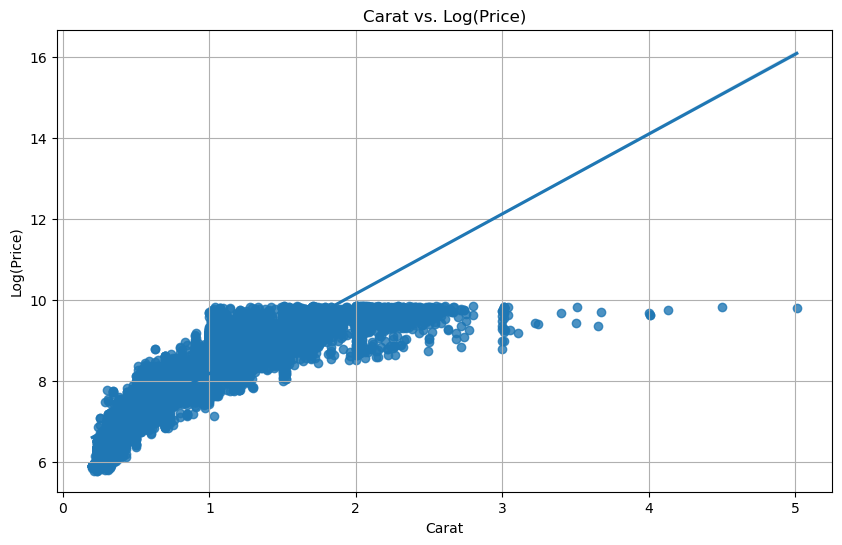

In [13]:
#Carat vs log of price

diamonds['log_carat'] = np.log(diamonds['carat'])
diamonds['log_price'] = np.log(diamonds['price'])


plt.figure(figsize=(10, 6))
sns.regplot(x = 'carat', y='log_price', data=diamonds)
plt.title('Carat vs. Log(Price)')
plt.xlabel('Carat')
plt.ylabel('Log(Price)')
plt.grid(True)
plt.show()

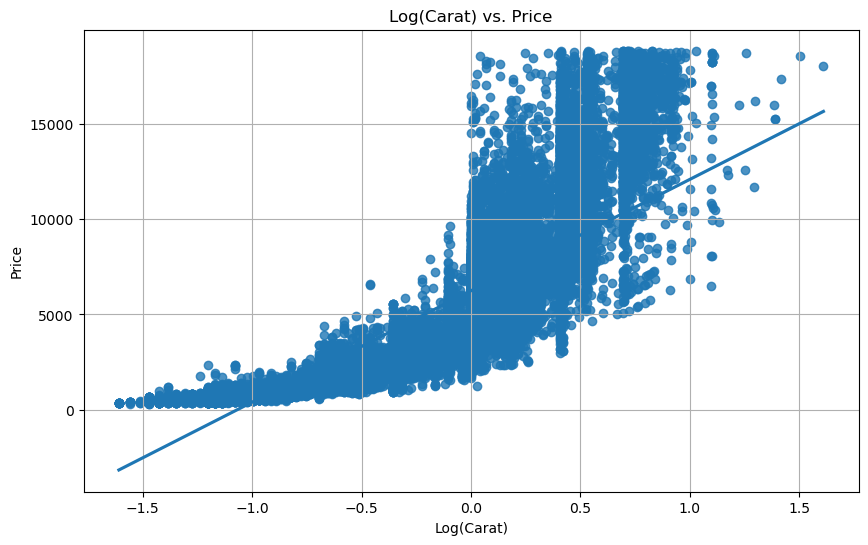

In [14]:
#Price vs log of carat

plt.figure(figsize=(10, 6))
sns.regplot(x = 'log_carat', y='price', data=diamonds)
plt.title('Log(Carat) vs. Price')
plt.xlabel('Log(Carat)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

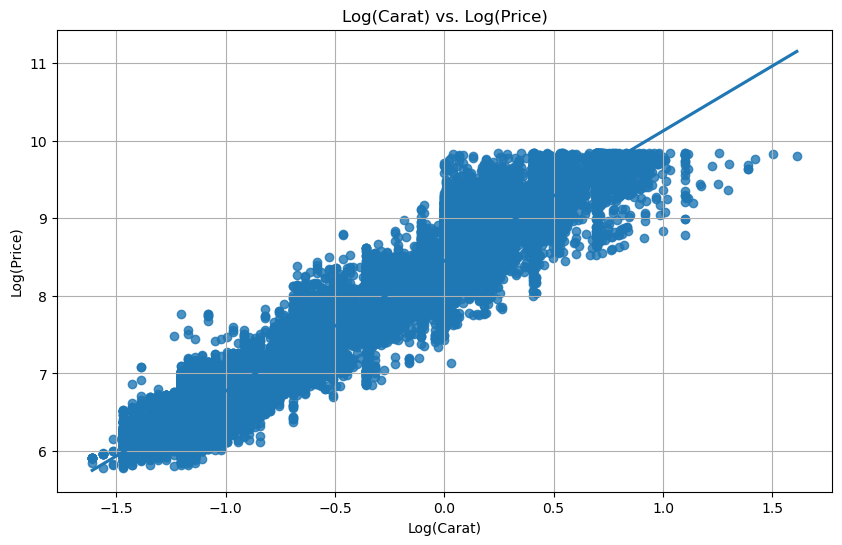

In [15]:
#Both log transformed

plt.figure(figsize=(10, 6))
sns.regplot(x = 'log_carat', y='log_price', data=diamonds)
plt.title('Log(Carat) vs. Log(Price)')
plt.xlabel('Log(Carat)')
plt.ylabel('Log(Price)')
plt.grid(True)
plt.show()

# OK
With these tools you should be able to visualize the relationship between two quantitative features and determine if other featuers in your dataset impact that relationship.  You can determine if a linear model is a good fit for the data by making a regression plot using Seaborn.